<a href="https://colab.research.google.com/github/roshank1605A04/Passenger-Prediction-Using-Time-Series-Analysis/blob/master/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install bokeh

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



In [0]:
# importing bokeh plots, palettes and models for interactive plotting

from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
from bokeh.models import LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar

In [0]:
train = pd.read_csv('drive/My Drive/Projects/Time Series Analysis/Train.csv')
test = pd.read_csv('drive/My Drive/Projects/Time Series Analysis/Test.csv')

print(train.shape)
print(test.shape)

(18288, 3)
(5112, 2)


In [0]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [0]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [0]:
train.isnull().any()

ID          False
Datetime    False
Count       False
dtype: bool

In [0]:
test.isnull().any()

ID          False
Datetime    False
dtype: bool

In [0]:
# changing the format of the Date-time to extract them

train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M') 

In [0]:
for i in (train, test):
    i['year'] = i.Datetime.dt.year 
    i['month'] = i.Datetime.dt.month 
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour
    
print(train.head(0))
print(test.head(2))

Empty DataFrame
Columns: [ID, Datetime, Count, year, month, day, Hour]
Index: []
      ID            Datetime  year  month  day  Hour
0  18288 2014-09-26 00:00:00  2014      9   26     0
1  18289 2014-09-26 01:00:00  2014      9   26     1


In [0]:
train['year'].value_counts()

2013    8760
2014    6432
2012    3096
Name: year, dtype: int64

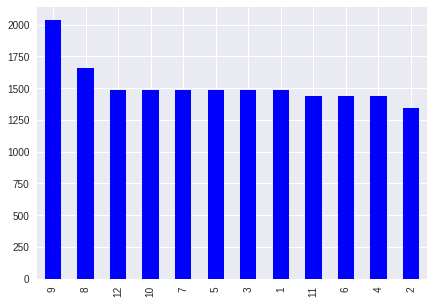

In [0]:
train['month'].value_counts().plot.bar(color = 'blue', figsize = (7, 5))

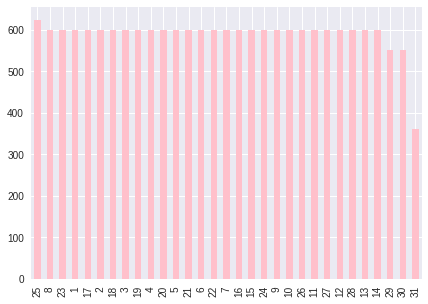

In [0]:
train['day'].value_counts().plot.bar(color = 'pink', figsize = (7, 5))

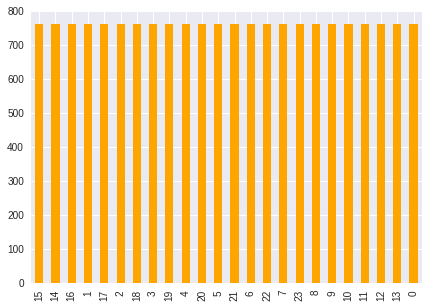

In [0]:
train['Hour'].value_counts().plot.bar(color = 'orange', figsize = (7, 5))

In [0]:
train['DayofWeek'] = train['Datetime'].dt.dayofweek
train.head(0)
test['DayofWeek'] = test['Datetime'].dt.dayofweek
test.head(0)



,ID,Datetime,year,month,day,Hour,DayofWeek


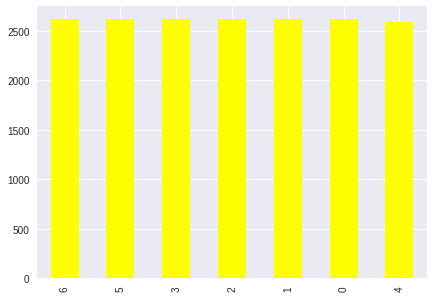

In [0]:
train['DayofWeek'].value_counts().plot.bar(color = 'yellow',figsize = (7, 5))

In [0]:
# lets create a weekend column here weekend means 5 and 6 corresponding to saturday and sunday

def applyer(row):
  if row.dayofweek == 5 or row.dayofweek == 6:
    return 1
  else:
    return 0
  
train['weekend'] = train['Datetime'].apply(applyer)
train.head(4)

,ID,Datetime,Count,year,month,day,Hour,DayofWeek,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1


In [0]:
train.tail(4)

,ID,Datetime,Count,year,month,day,Hour,DayofWeek,weekend
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3,0
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3,0
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3,0
18287,18287,2014-09-25 23:00:00,534,2014,9,25,23,3,0


In [0]:
test['weekend'] = test['Datetime'].apply(applyer)
test.head(0)

,ID,Datetime,year,month,day,Hour,DayofWeek,weekend


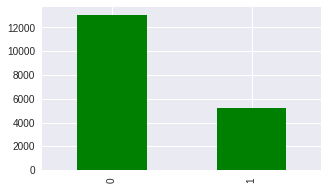

In [0]:
train['weekend'].value_counts().plot.bar(color = 'green', figsize = (5, 3))

In [0]:
# plotting a time series for the datetime and passenger count

TOOLS = "save, pan, box_zoom, reset, wheel_zoom, tap"

output_file("line_chart_ts.html", title = 'Line_chart')
x = train.Datetime
y = train.Count

output_notebook()
p = figure(tools = TOOLS, title="Passenger Count through Time", y_axis_type="linear", x_axis_type='datetime')
p.line(x, y)
show(p)




INFO:bokeh.io.state:Session output file 'line_chart_ts.html' already exists, will be overwritten.


Loading BokehJS ...

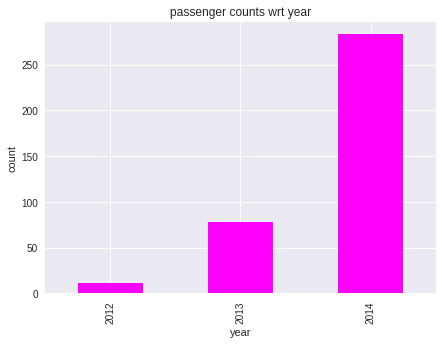

In [0]:
# plotting comparison of year with respect to passenger counts

train.groupby('year')['Count'].mean().plot.bar(color = 'magenta', figsize = (7, 5))
plt.title('passenger counts wrt year')
plt.ylabel('count')
plt.show()

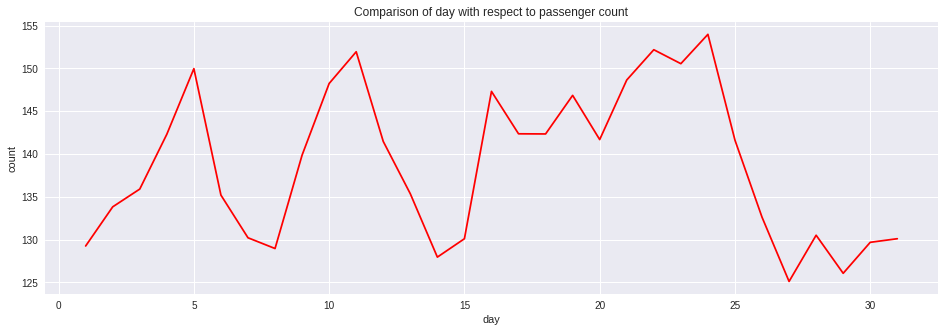

In [0]:
# plotting comparison of day with respect to passenger counts

train.groupby('day')['Count'].mean().plot.line(color = 'red', figsize = (16, 5))
plt.title('Comparison of day with respect to passenger count')
plt.ylabel('count')
plt.show()

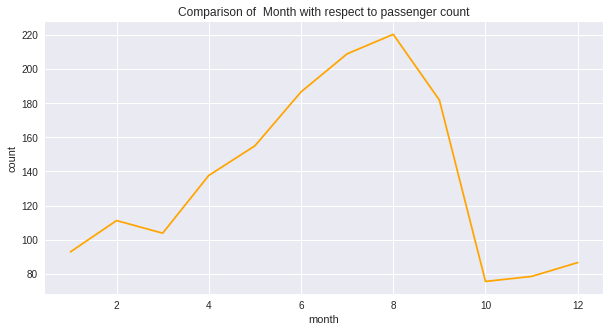

In [0]:
# plotting comparison of month with respect to count of passenger

train.groupby('month')['Count'].mean().plot.line(color = 'orange', figsize = (10, 5))
plt.title('Comparison of  Month with respect to passenger count')
plt.ylabel('count')
plt.show()

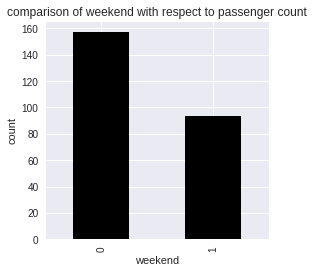

In [0]:
#plotting comparison of weekend with respect to passenger count

train.groupby('weekend')['Count'].mean().plot.bar(color = 'black', figsize = (4, 4))
plt.title('comparison of weekend with respect to passenger count')
plt.ylabel('count')
plt.show()

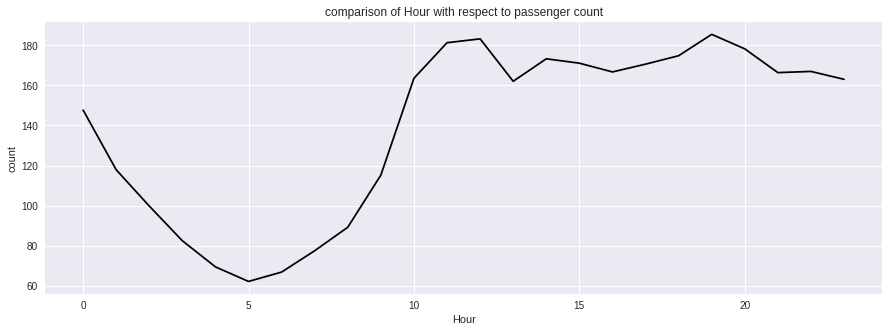

In [0]:
#plotting comparison of hour with respect to passenger count

train.groupby('Hour')['Count'].mean().plot.line(color = 'black', figsize = (15, 5))
plt.title('comparison of Hour with respect to passenger count')
plt.ylabel('count')
plt.show()

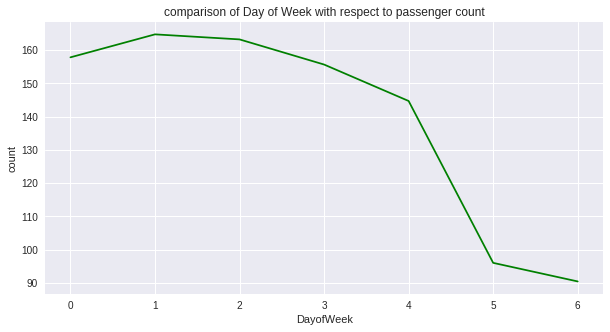

In [0]:
#plotting comparison of day of week with respect to passenger count

train.groupby('DayofWeek')['Count'].mean().plot.line(color = 'green', figsize = (10, 5))
plt.title('comparison of Day of Week with respect to passenger count')
plt.ylabel('count')
plt.show()

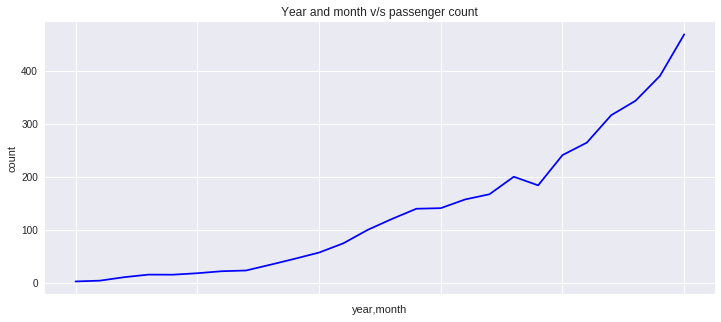

In [0]:
# comparison of year and month with respect to passenger count

train.groupby(['year','month'])['Count'].mean().plot.line(color = 'blue', figsize = (12, 5))
plt.title('Year and month v/s passenger count')
plt.ylabel('count')
plt.show()

In [0]:
# removing unnecassary columns from the train dataset

train = train.drop('ID', axis = 1)
train.head(0)

,Datetime,Count,year,month,day,Hour,DayofWeek,weekend


In [0]:
# As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series 
# to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Hourly time series
hourly = train.resample('H').mean()

# Converting to daily mean
daily = train.resample('D').mean()

# Converting to weekly mean
weekly = train.resample('W').mean()

# Converting to monthly mean
monthly = train.resample('M').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


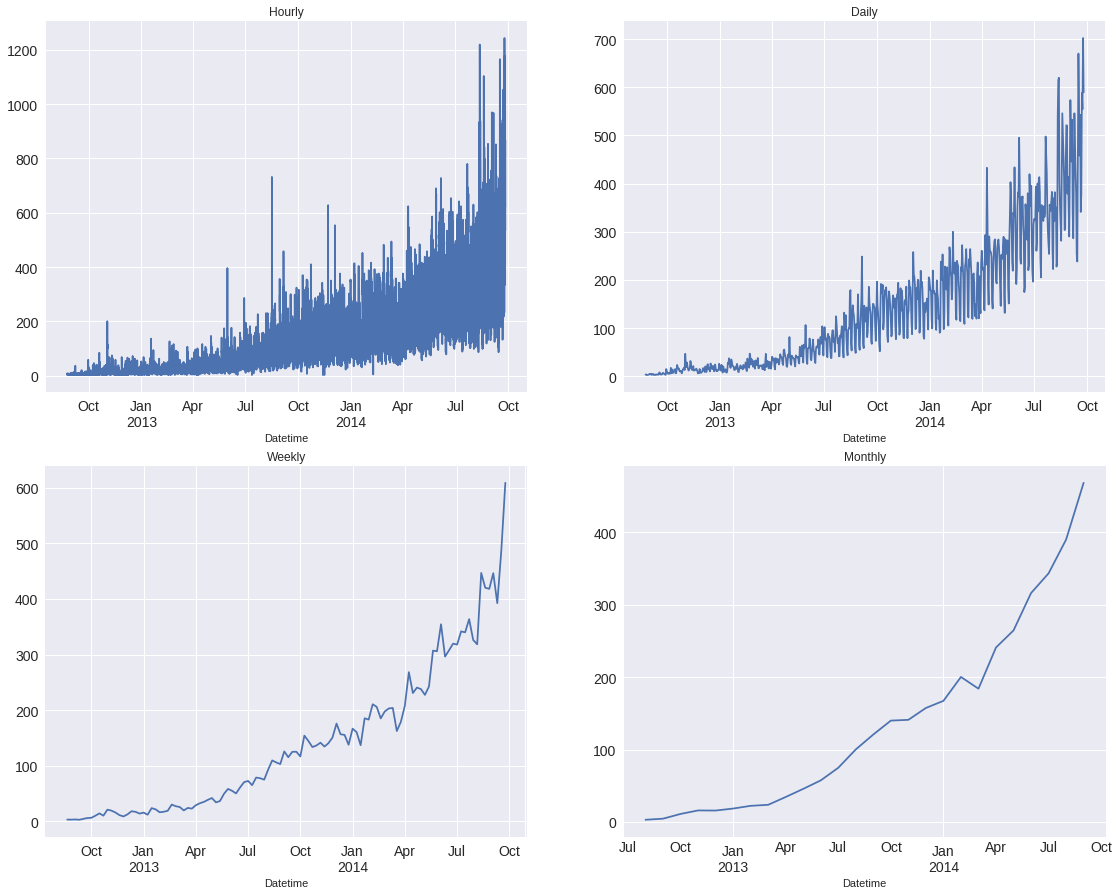

In [0]:

fig, axs = plt.subplots(2, 2)

hourly.Count.plot(figsize=(19,15), title= 'Hourly', fontsize=14, ax=axs[0, 0])
daily.Count.plot(figsize=(19,15), title= 'Daily', fontsize=14, ax=axs[0, 1])
weekly.Count.plot(figsize=(19,15), title= 'Weekly', fontsize=14, ax=axs[1, 0])
monthly.Count.plot(figsize=(19,15), title= 'Monthly', fontsize=14, ax=axs[1, 1])

plt.show()

In [0]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 762 entries, 2012-08-25 to 2014-09-25
Freq: D
Data columns (total 7 columns):
Count        762 non-null float64
year         762 non-null float64
month        762 non-null float64
day          762 non-null float64
Hour         762 non-null float64
DayofWeek    762 non-null float64
weekend      762 non-null float64
dtypes: float64(7)
memory usage: 47.6 KB


In [0]:
train.describe()

,Count,year,month,day,Hour,DayofWeek,weekend
count,762.000000,762.000000,762.000000,762.000000,762.0,762.000000,762.000000
mean,138.958115,2013.182415,6.620735,15.744094,11.5,2.998688,0.286089
std,135.911437,0.698830,3.408151,8.808900,0.0,2.002298,0.452228
min,2.416667,2012.000000,1.000000,1.000000,11.5,0.000000,0.000000
25%,24.250000,2013.000000,4.000000,8.000000,11.5,1.000000,0.000000
50%,99.125000,2013.000000,7.000000,16.000000,11.5,3.000000,0.000000
75%,215.958333,2014.000000,9.000000,23.000000,11.5,5.000000,1.000000
max,702.333333,2014.000000,12.000000,31.000000,11.5,6.000000,1.000000


In [0]:
train.groupby('Datetime').describe()

Count                                                      \
           count        mean std         min         25%         50%   
Datetime                                                               
2012-08-25   1.0    3.166667 NaN    3.166667    3.166667    3.166667   
2012-08-26   1.0    3.666667 NaN    3.666667    3.666667    3.666667   
2012-08-27   1.0    2.583333 NaN    2.583333    2.583333    2.583333   
2012-08-28   1.0    2.416667 NaN    2.416667    2.416667    2.416667   
2012-08-29   1.0    2.500000 NaN    2.500000    2.500000    2.500000   
2012-08-30   1.0    3.083333 NaN    3.083333    3.083333    3.083333   
2012-08-31   1.0    3.250000 NaN    3.250000    3.250000    3.250000   
2012-09-01   1.0    4.666667 NaN    4.666667    4.666667    4.666667   
2012-09-02   1.0    4.916667 NaN    4.916667    4.916667    4.916667   
2012-09-03   1.0    4.500000 NaN    4.500000    4.500000    4.500000   
2012-09-04   1.0    2.750000 NaN    2.750000    2.750000    2.750000   
2012-09-05   1.0    4.333333 NaN    4.333333    4.333333    4.333333   
2012-09-06   1.0    4.166667 NaN    4.166667    4.166667    4.166667   
2012-09-07   1.0    2.833333 NaN    2.833333    2.833333    2.833333   
2012-09-08   1.0    4.166667 NaN    4.166667    4.166667    4.166667   
2012-09-09   1.0    2.833333 NaN    2.833333    2.833333    2.833333   
2012-09-10   1.0    2.666667 NaN    2.666667    2.666667    2.666667   
2012-09-11   1.0    2.416667 NaN    2.416667    2.416667    2.416667   
2012-09-12   1.0    3.500000 NaN    3.500000    3.500000    3.500000   
2012-09-13   1.0    3.000000 NaN    3.000000    3.000000    3.000000   
2012-09-14   1.0    3.500000 NaN    3.500000    3.500000    3.500000   
2012-09-15   1.0    3.833333 NaN    3.833333    3.833333    3.833333   
2012-09-16   1.0    2.916667 NaN    2.916667    2.916667    2.916667   
2012-09-17   1.0    3.833333 NaN    3.833333    3.833333    3.833333   
2012-09-18   1.0    7.833333 NaN    7.833333    7.833333    7.833333   
2012-09-19   1.0    6.583333 NaN    6.583333    6.583333    6.583333   
2012-09-20   1.0    3.500000 NaN    3.500000    3.500000    3.500000   
2012-09-21   1.0    3.750000 NaN    3.750000    3.750000    3.750000   
2012-09-22   1.0    3.250000 NaN    3.250000    3.250000    3.250000   
2012-09-23   1.0    4.250000 NaN    4.250000    4.250000    4.250000   
...          ...         ...  ..         ...         ...         ...   
2014-08-27   1.0  520.666667 NaN  520.666667  520.666667  520.666667   
2014-08-28   1.0  379.250000 NaN  379.250000  379.250000  379.250000   
2014-08-29   1.0  413.750000 NaN  413.750000  413.750000  413.750000   
2014-08-30   1.0  352.583333 NaN  352.583333  352.583333  352.583333   
2014-08-31   1.0  290.166667 NaN  290.166667  290.166667  290.166667   
2014-09-01   1.0  436.000000 NaN  436.000000  436.000000  436.000000   
2014-09-02   1.0  573.500000 NaN  573.500000  573.500000  573.500000   
2014-09-03   1.0  509.000000 NaN  509.000000  509.000000  509.000000   
2014-09-04   1.0  446.000000 NaN  446.000000  446.000000  446.000000   
2014-09-05   1.0  532.500000 NaN  532.500000  532.500000  532.500000   
2014-09-06   1.0  339.833333 NaN  339.833333  339.833333  339.833333   
2014-09-07   1.0  286.500000 NaN  286.500000  286.500000  286.500000   
2014-09-08   1.0  426.000000 NaN  426.000000  426.000000  426.000000   
2014-09-09   1.0  546.000000 NaN  546.000000  546.000000  546.000000   
2014-09-10   1.0  483.000000 NaN  483.000000  483.000000  483.000000   
2014-09-11   1.0  424.166667 NaN  424.166667  424.166667  424.166667   
2014-09-12   1.0  375.416667 NaN  375.416667  375.416667  375.416667   
2014-09-13   1.0  253.333333 NaN  253.333333  253.333333  253.333333   
2014-09-14   1.0  238.166667 NaN  238.166667  238.166667  238.166667   
2014-09-15   1.0  445.333333 NaN  445.333333  445.333333  445.333333   
2014-09-16   1.0  670.000000 NaN  670.000000  670.000000  670.000000   
2014-09-17   1.0  569.833333 NaN  569.833333  569.8

In [0]:
# splitting the train set into dependent and independent sets

Train = train.loc['2012-08-25':'2014-06-24']
valid = train.loc['2014-06-25':'2014-09-25']

print(train.shape)
print(valid.shape)

(762, 7)
(93, 7)


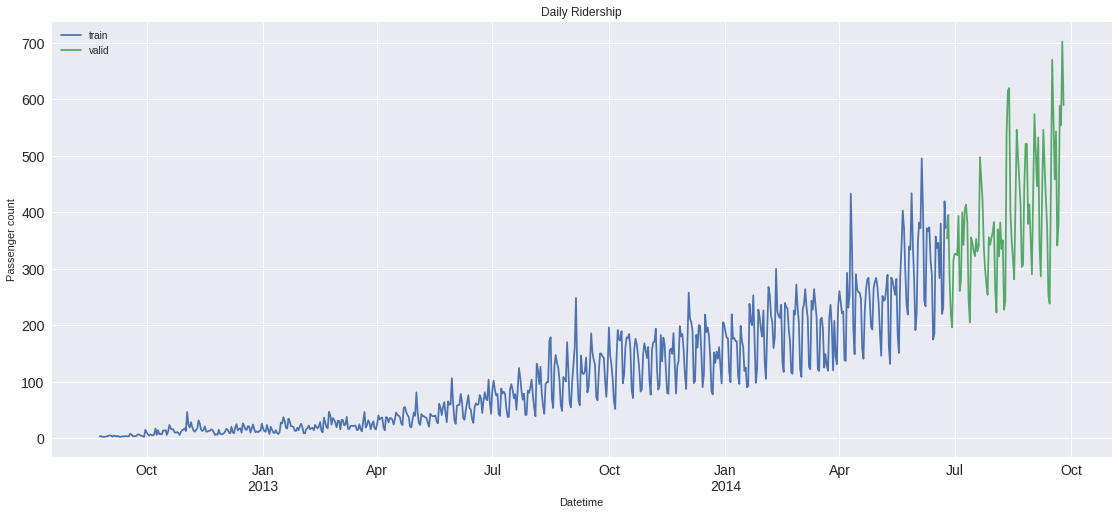

In [0]:
# plotting the daily ridership in train and valid sets

Train.Count.plot(figsize = (19, 8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize = (19, 8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

'**Statistical Modelling**'

**Naive Forcast**

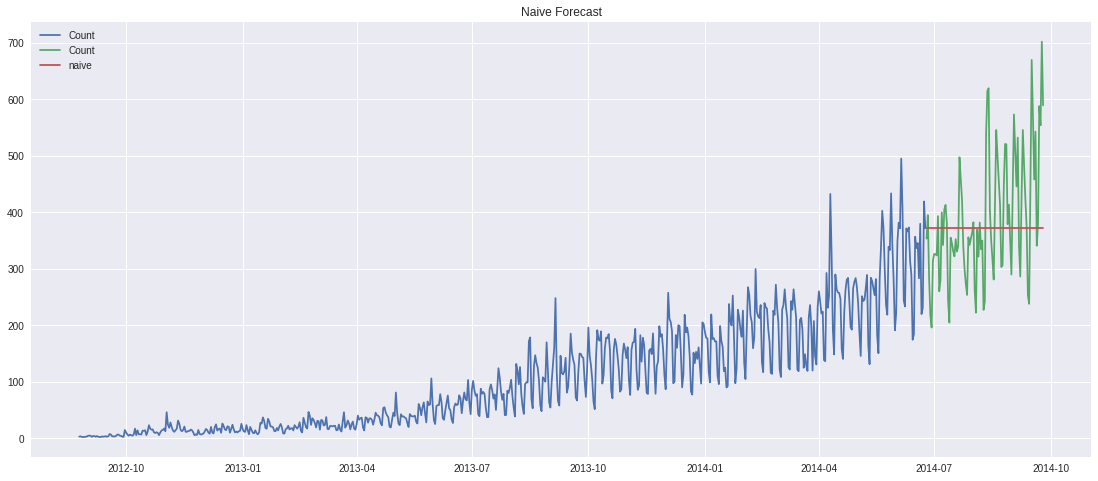

In [0]:
# plotting the results of naive forcast

dd = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]


plt.figure(figsize = (19, 8))
plt.plot(Train.index, Train['Count'])
plt.plot(valid.index,valid['Count'])
plt.plot(y_hat.index,y_hat['naive'])

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [0]:
# checking the rmse error for the naive forcast model

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

111.79050467496724


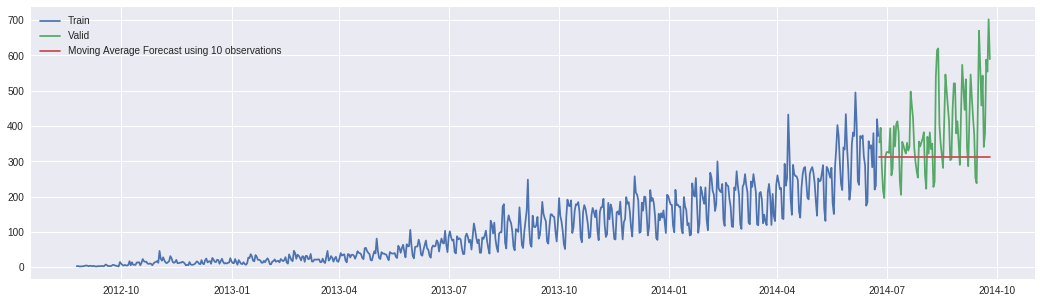

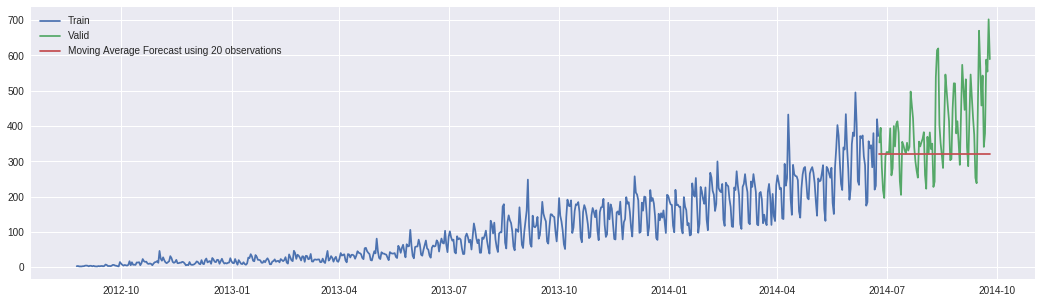

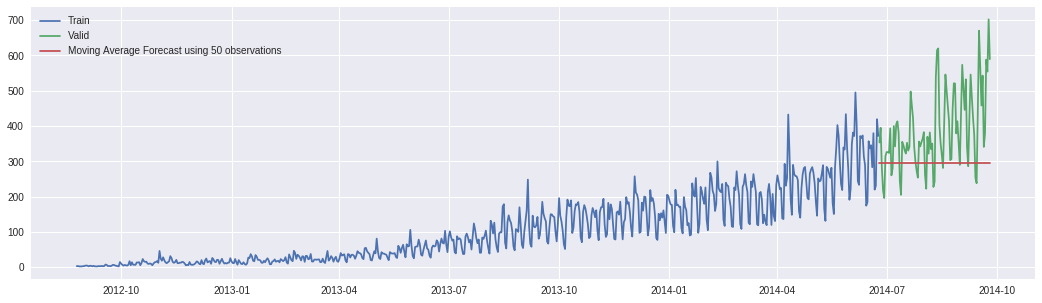

In [0]:
# Lets try the rolling mean for last 10, 20, 50 days and visualize the results.

# average of last 10 observations.
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] 

plt.figure(figsize=(18, 5)) 
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()

# average of last 20 observations.
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] 

plt.figure(figsize=(18, 5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()

# average of last 50 observations.
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1]

plt.figure(figsize=(18, 5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

In [0]:
# checking the rmse error for the moving averages model

rmse = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
print(rmse)

144.19175679986802


**Arima Model**

In [0]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=24).mean() # 24 hours on each day
    rolstd = timeseries.rolling(window=24).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print (dfoutput)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
  import sys


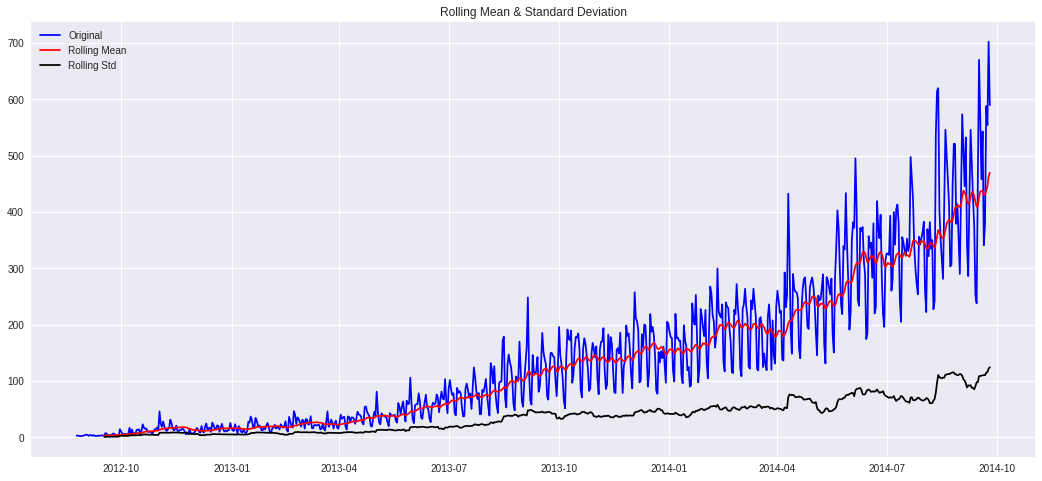

Results of Dickey-Fuller Test:
Test Statistic                   2.986351
p-value                          1.000000
#Lags Used                      20.000000
Number of Observations Used    741.000000
Critical Value (1%)             -3.439206
Critical Value (5%)             -2.865448
Critical Value (10%)            -2.568851
dtype: float64


In [0]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 8

test_stationarity(train['Count'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  after removing the cwd from sys.path.


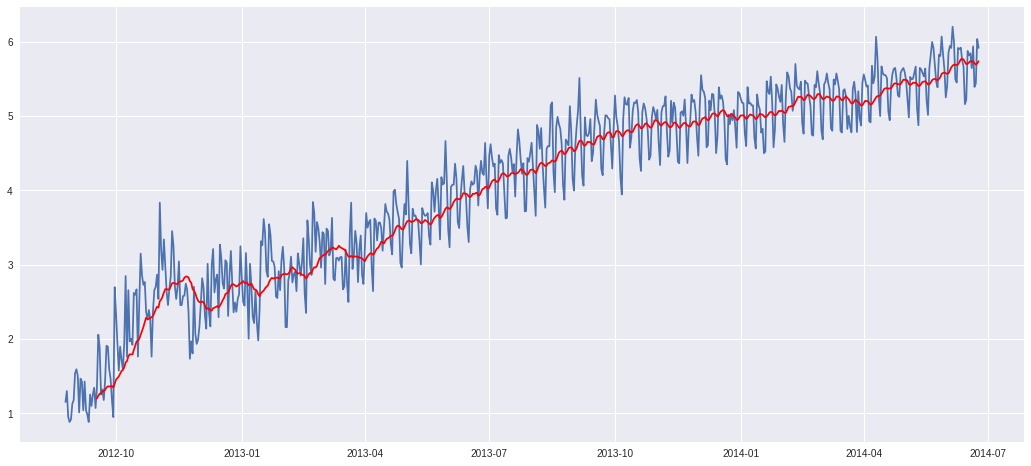

In [0]:
# Removing Trend

Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

moving_avg = pd.rolling_mean(Train_log, 24)
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
  import sys


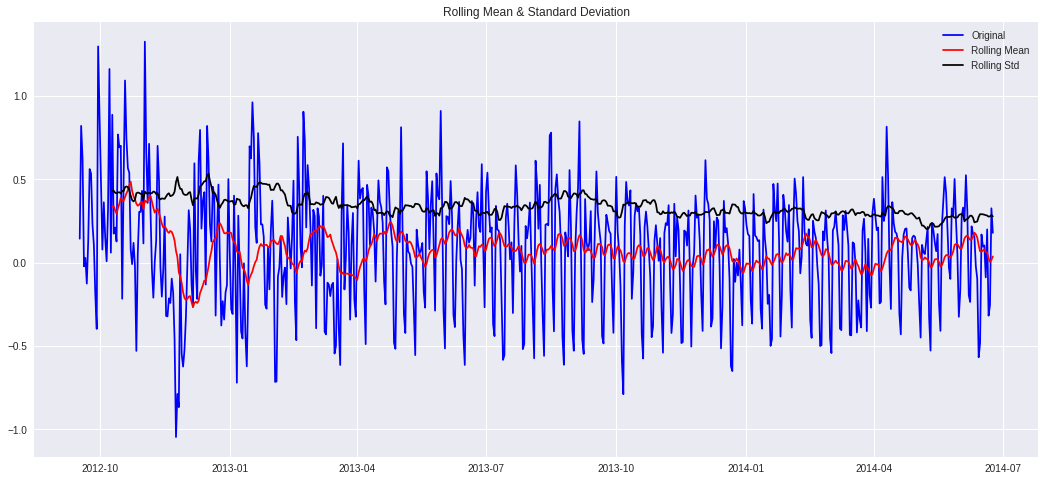

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [0]:
train_log_moving_avg_diff = Train_log - moving_avg

#Since we took the average of 24 values, rolling mean is not defined for the first 23 values. So let’s drop those null values.

train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
  import sys


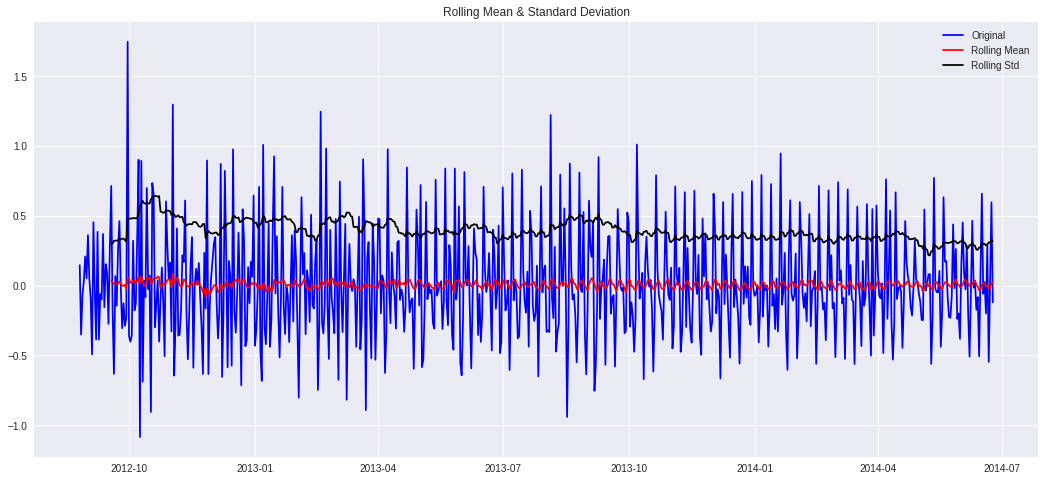

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [0]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

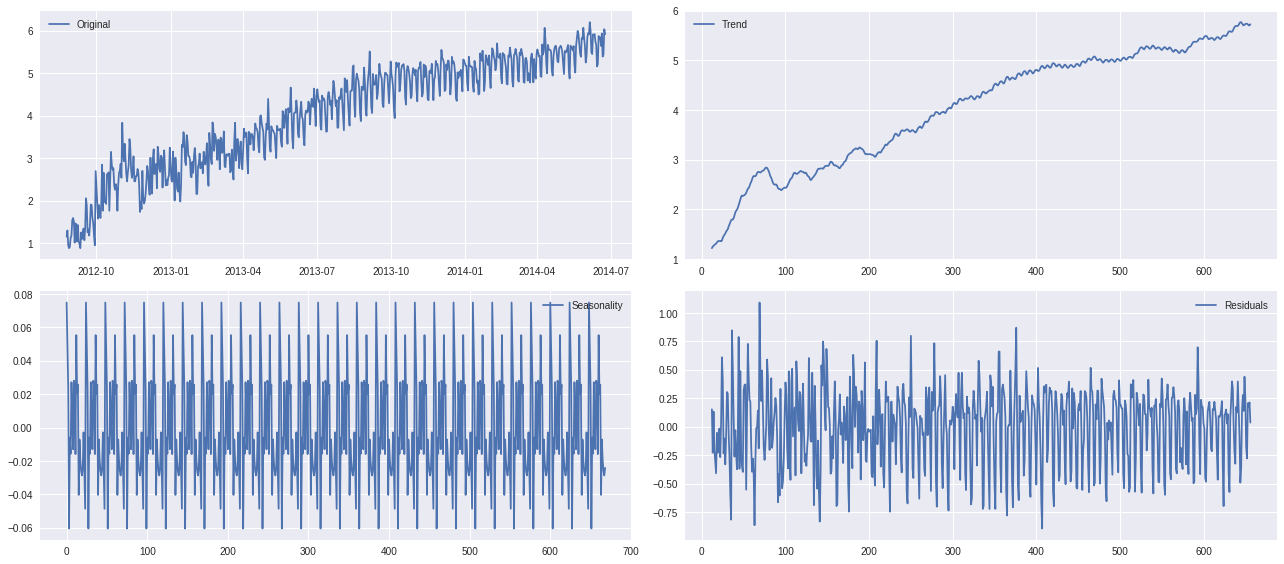

In [0]:
# Removing seasonality

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(221)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')

plt.subplot(222)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(224)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
  import sys


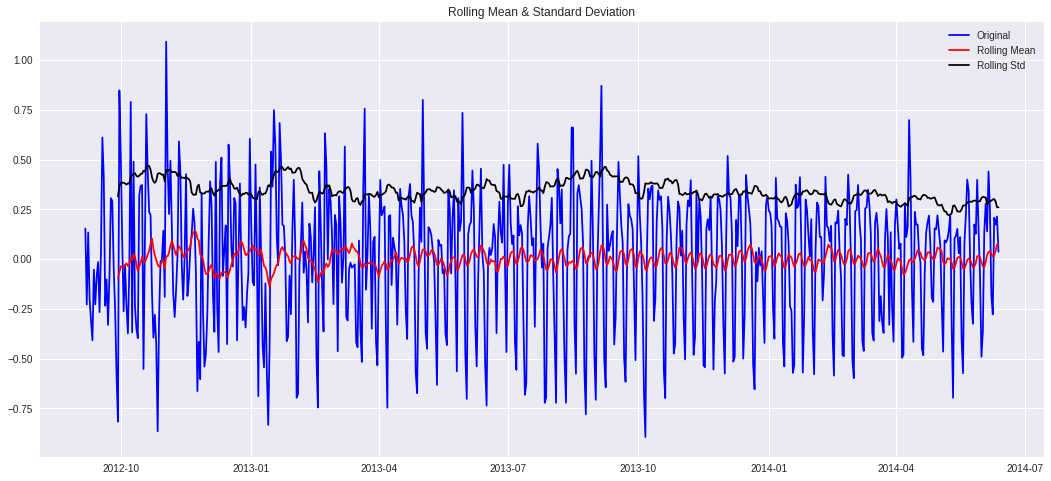

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [0]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

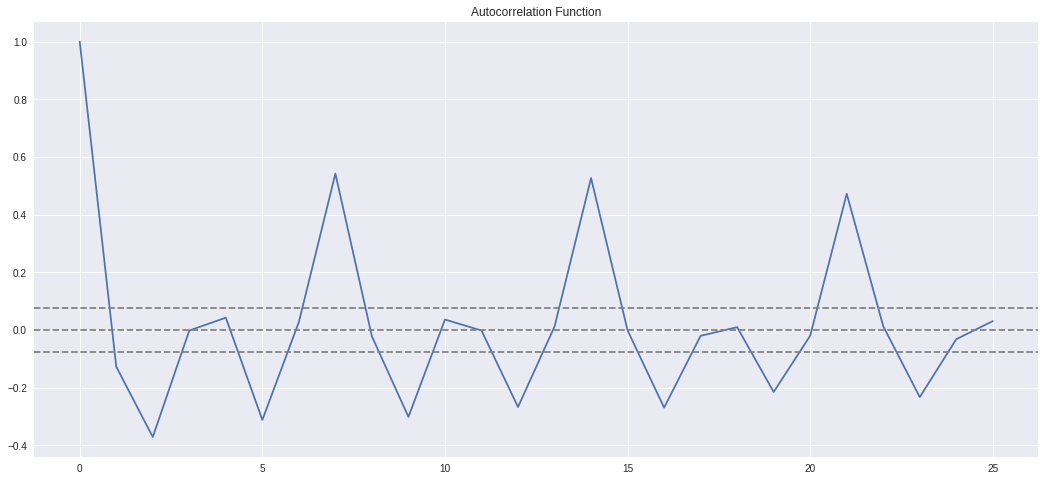

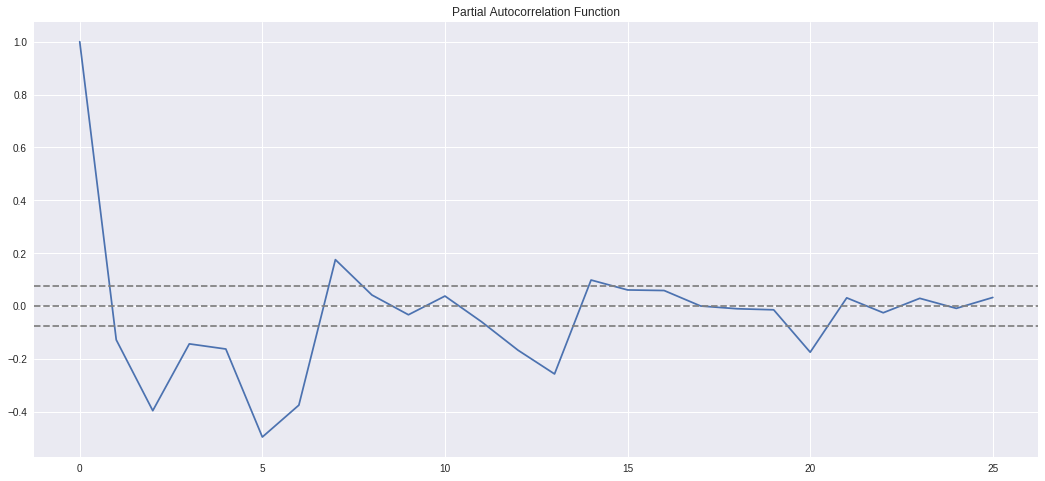

In [0]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

#ACF and PACF plot

plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


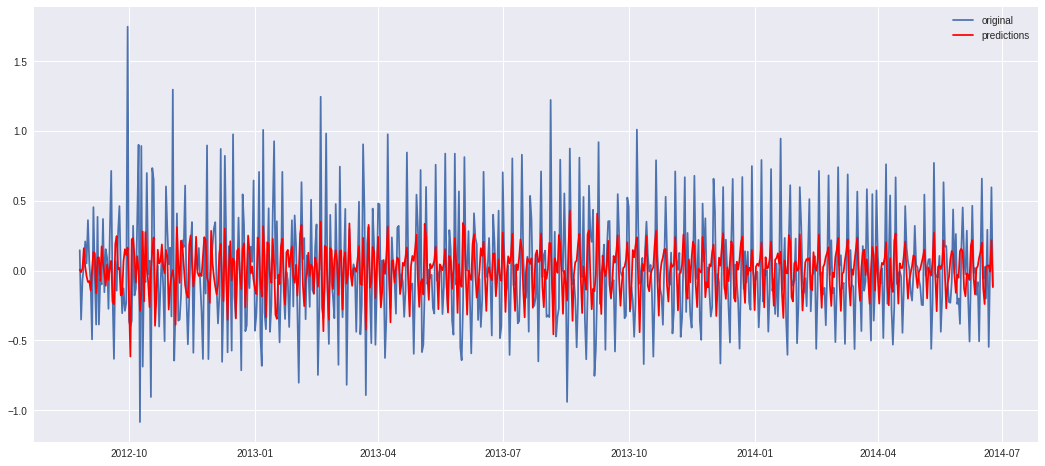

In [0]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


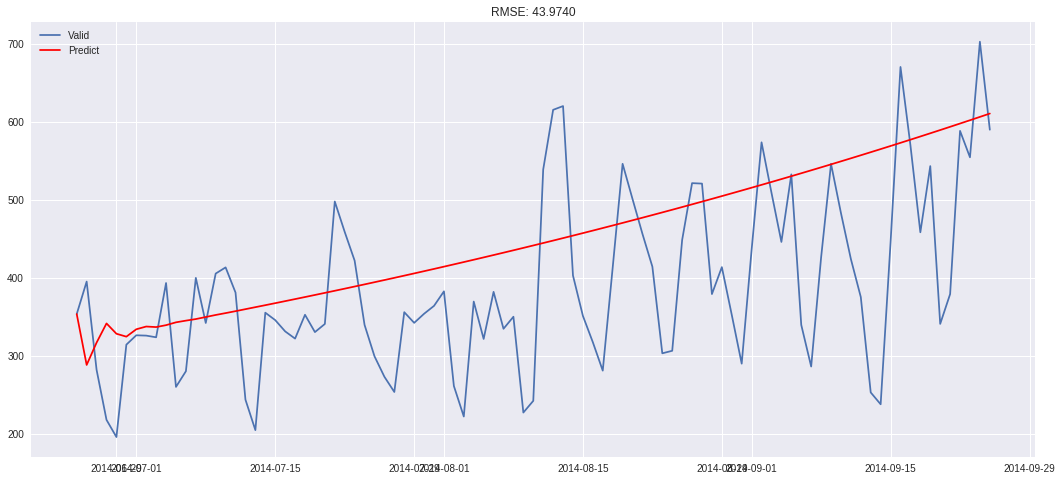

In [0]:
AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

plt.plot(valid['Count'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0]))
plt.show()